<h3>Nama : Muh. Azhar Tawakkal</h3>
<h3>NIM : H071201041</h3>
<h3>Kelas : Pengolahan Citra Digital A</h3>

In [368]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Text(0.5, 1.0, 'Gambar awal')

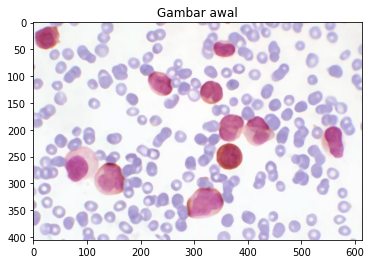

In [398]:
image = cv2.imread("/content/cell darah.png")
image = cv2.medianBlur(image, 5)
image_r = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image)
plt.title("Gambar awal")

In [399]:
twoDimage = image_r.reshape((-1,3))
twoDimage = np.float32(twoDimage)

Text(0.5, 1.0, 'Gambar setelah K-Mean')

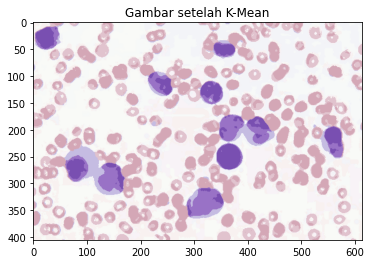

In [400]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(twoDimage,10,None,criteria,5,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
k_image = res.reshape((image_r.shape))
image1 = cv2.cvtColor(k_image, cv2.COLOR_HSV2RGB)
plt.imshow(image1)
plt.title("Gambar setelah K-Mean")

Text(0.5, 1.0, 'Perbaikan pada channel RGB')

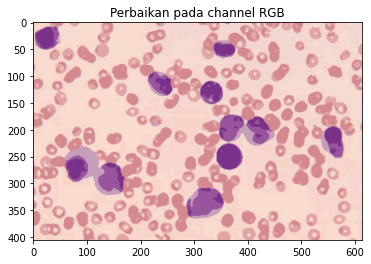

In [401]:
red = np.round(image1[:,:,0]).astype(int)
green = np.round(image1[:,:,1]-30).astype(int)
blue = np.round(image1[:,:,2]-40).astype(int)
imager1 = np.dstack((red,green,blue))
imager1 = np.array(imager1, dtype=np.uint8)
imager12 = cv2.cvtColor(imager1, cv2.COLOR_HSV2RGB)
plt.imshow(imager1, cmap="hsv")
plt.title("Perbaikan pada channel RGB")

Text(0.5, 1.0, 'Penambahan Kecerahan')

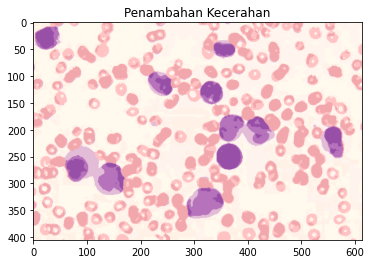

In [402]:
alpha=1
beta=30

new_image=cv2.addWeighted(imager1,alpha,np.zeros(image.shape, image.dtype),0,beta)
image2 = cv2.cvtColor(k_image, cv2.COLOR_HSV2RGB)
plt.imshow(new_image)
plt.title("Penambahan Kecerahan")

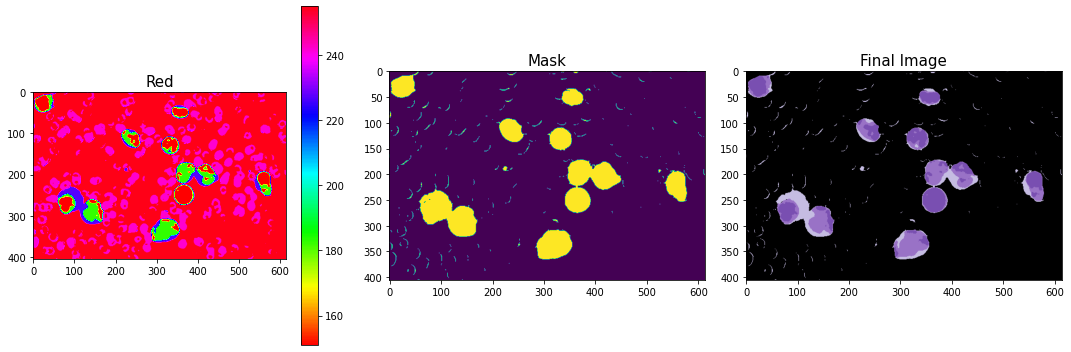

In [403]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
im = ax[0].imshow(new_image[:,:,0], cmap='hsv')
fig.colorbar(im,ax=ax[0])
ax[0].set_title('Red',fontsize=15)

lower_mask = new_image[:,:,0] >= 0
upper_mask = new_image[:,:,0] <= 229
mask = upper_mask*lower_mask

red1 = image1[:,:,0]*mask
green1 = image1[:,:,1]*mask
blue1 = image1[:,:,2]*mask
mask2 = np.dstack((red1,green1,blue1))
ax[1].imshow(mask)
ax[2].imshow(mask2)

ax[1].set_title('Mask',fontsize=15)
ax[2].set_title('Final Image',fontsize=15)
plt.tight_layout()
plt.show()

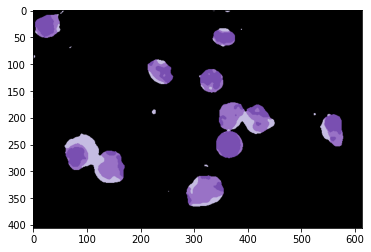

In [407]:
source = cv2.medianBlur(mask2, 5)
plt.imshow(source)

Text(0.5, 1.0, 'Gambar pasca k-mean kedua')

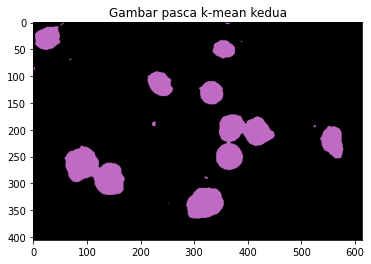

In [408]:
twoDimage = source.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(twoDimage,2,None,criteria,10,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
k_image = res.reshape((image_r.shape))
image1 = cv2.cvtColor(k_image, cv2.COLOR_HSV2RGB)
plt.imshow(image1)
plt.title("Gambar pasca k-mean kedua")

Text(0.5, 1.0, 'Hasil akhir')

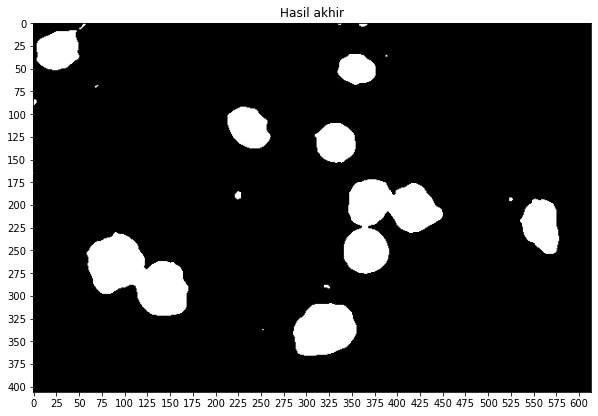

In [409]:
im2 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
ret2,th2 = cv2.threshold(im2,0,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.xticks(np.arange(0, im2.shape[1], 25))
plt.yticks(np.arange(0, im2.shape[0], 25))
plt.imshow(th2, cmap="gray")
plt.title("Hasil akhir")